In [4]:
from fastai.learner import *

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
#data gen
def lin(a,b,x): return a*x+b

In [6]:
def gen_fake_data(n,a,b):
    x=np.random.uniform(0,1,n)
    y=lin(a,b,x)+0.1*np.random.normal(0,3,n)
    return x,y

x,y = gen_fake_data(50, 3., 8.)

Text(0, 0.5, 'y')

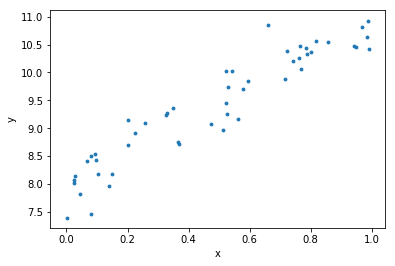

In [7]:
plt.scatter(x,y,s=8);plt.xlabel('x');plt.ylabel('y')

In [8]:
def mse(y_hat,y): return ((y_hat-y)**2).mean()
def mse_loss(a,b,x,y): return mse(lin(a,b,x),y)

In [9]:
mse_loss(10,5,x,y)

5.29926454946663

### Example gradient descent with PyTorch

In [12]:
x,y = gen_fake_data(10000, 3., 8.)
x.shape,y.shape

((10000,), (10000,))

In [14]:
x,y = V(x),V(y)

In [15]:
# create random weights a and b, wrap them in variables
a=V(np.random.randn(1),requires_grad=True)
b=V(np.random.randn(1),requires_grad=True)
a,b

(Variable containing:
  1.0551
 [torch.cuda.FloatTensor of size 1 (GPU 0)], Variable containing:
 -1.1583
 [torch.cuda.FloatTensor of size 1 (GPU 0)])

In [16]:
learning_rate = 1e-3
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    loss = mse_loss(a,b,x,y)
    if t%1000 == 0: print(loss.data[0])
    
    # Computes the gradient of loss with respect to all Variables with requires_grad=True.
    # After this call a.grad and b.grad will be Variables holding the gradient
    # of the loss with respect to a and b respectively
    loss.backward()
    
    # Update a and b using gradient descent; a.data and b.data are Tensors,
    # a.grad and b.grad are Variables and a.grad.data and b.grad.data are Tensors
    a.data -= learning_rate * a.grad.data
    b.data -= learning_rate * b.grad.data
    
    # Zero the gradients
    a.grad.data.zero_()
    b.grad.data.zero_()

103.09209442138672
1.068007230758667
0.35920658707618713
0.29488712549209595
0.2482401430606842
0.21226443350315094
0.18450407683849335
0.16308312118053436
0.14655360579490662
0.13379915058612823


### Example gradient descent only with NumPy: 

In [17]:
x, y = gen_fake_data(50, 3., 8.)

In [18]:
a_guess,b_guess = -1., 1.
mse_loss(a_guess, b_guess, x, y)

84.59695827471086

In [19]:
lr=0.01
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [20]:
for i in range(300): 
    upd()
    print(mse_loss(a_guess, b_guess, x, y))

80.30115382753415
76.2237207335474
72.35355838031697
68.68013044003857
65.19343618489056
61.88398326053285
58.74276184362815
55.76122011303043
52.93124096786277
50.24511992909991
47.69554416449412
45.27557257974072
42.97861692168201
40.79842384210465
38.72905787329932
36.76488526903499
34.90055866695543
33.131002530641915
31.451399331709144
29.857176434315594
28.343993646381996
26.907731403626908
25.544479554250785
24.250526713735493
23.022350160778252
21.856606246852007
20.750121293282973
19.699882951062854
18.70303199987335
17.75685456399615
16.858774723916664
16.006347503506863
15.197252213695197
14.429286134502066
13.700358518240483
13.008484897555922
12.351781682809257
11.728461034094444
11.136825993930263
10.575265867375096
10.042251836987298
9.53633280069316
9.056131421231239
8.600340376417796
8.167718800024964
7.757088903582074
7.367332769903092
6.997389309610809
6.646251372371977
6.312963004978923
5.996616848812854
5.696351669603628
5.411350012760831
5.140835977892916
4.884073